0.9333333333333333


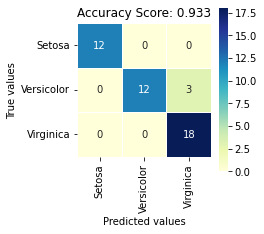

In [63]:
import nbdime
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

xTrain, xTest, yTrain, yTest = train_test_split(iris.data, iris.target, test_size=0.3)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(xTrain, yTrain)
predictionsLogReg = model.predict(xTest)

score = model.score(xTest, yTest)
print(score)

cm = metrics.confusion_matrix(yTest, predictionsLogReg)
xAxisLabels = ('Setosa', 'Versicolor', 'Virginica')
yAxisLabels = ('Setosa', 'Versicolor', 'Virginica')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % score
plt.title(allSampleTitle, size = 12)
plt.show()

#### a)
Above we can see the confusion matrix, the accuracy score varies from run to run since we do not have a seed set. However it approximates to 0.94 score.

In [64]:
def classOfNeighbour(N, weight):
    knn = KNeighborsClassifier(n_neighbors=N, weights=weight)
    knn.fit(xTrain, yTrain)
    predictions = knn.predict(xTest)
    score = metrics.accuracy_score(yTest, predictions)
    cm = metrics.confusion_matrix(yTest, predictions)
    return score, cm

numberOfMeasurments = 105
magnitude = 1
classificationByNUniform = np.zeros(numberOfMeasurments, dtype = float)
classificationByNDistance = np.zeros(numberOfMeasurments, dtype = float)
cmUni = np.array([[classOfNeighbour(1, "uniform")[1]], [classOfNeighbour(10, "uniform")[1]], [classOfNeighbour(40, "uniform")[1]], [classOfNeighbour(70, "uniform")[1]], [classOfNeighbour(100, "uniform")[1]]])
cmDist = np.array([[classOfNeighbour(1, "distance")[1]], [classOfNeighbour(10, "distance")[1]], [classOfNeighbour(40, "distance")[1]], [classOfNeighbour(70, "distance")[1]], [classOfNeighbour(100, "distance")[1]]])
scoreUni = np.array([[classOfNeighbour(1, "uniform")[0]], [classOfNeighbour(10, "uniform")[0]], [classOfNeighbour(40, "uniform")[0]], [classOfNeighbour(70, "uniform")[0]], [classOfNeighbour(100, "uniform")[0]]])
scoreDist = np.array([[classOfNeighbour(1, "distance")[0]], [classOfNeighbour(10, "distance")[0]], [classOfNeighbour(40, "distance")[0]], [classOfNeighbour(70, "distance")[0]], [classOfNeighbour(100, "distance")[0]]])
indexByK = np.zeros(numberOfMeasurments, dtype=int)
fiveDifferentK = [1, 10, 40, 70, 100]

for i in range(numberOfMeasurments):
    iNUni = classOfNeighbour(i*magnitude+1, "uniform")[0]
    iNDist = classOfNeighbour(i*magnitude+1, "distance")[0]
    classificationByNUniform[i] = iNUni
    classificationByNDistance[i] = iNDist
    indexByK[i] = i*magnitude+1

dfClassification = pd.DataFrame({"K": indexByK, "Uniform": classificationByNUniform, "Distance": classificationByNDistance})
#print(dfClassification.to_string(index=False))
print("Best K: ", magnitude * np.argmax(dfClassification.Uniform)+1, "Accuracy: ", max(dfClassification.Uniform))
print("Best K: ", magnitude * np.argmax(dfClassification.Distance)+1, "Accuracy: ", max(dfClassification.Distance))
plt.plot(indexByK, classificationByNUniform)
plt.plot(indexByK, classificationByNDistance)
plt.legend(['Uniform', 'Distance'], loc = "lower left")
plt.show()


#### b)
We can see that the classification model K-Nearest-Neighbors performs well in both its weight methods when the number of neighbors is not very many. However with more neighbors considered we notice that the two weight methods vary alot between one another, where the distance based weight is clearly prefered as the number of neighbors does not effect the result by alot. This is because when analysing data points far from the source point, the weight is less thus contributes less to the result, whilst the closest neighbors contributes a lot (in most cases). However for the uniform weight, every neighbor contributes equally to the result which implies that considering more neighbors results in bad accuracy.

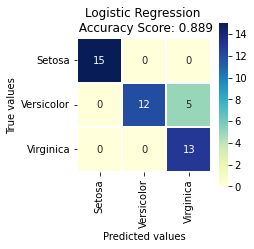

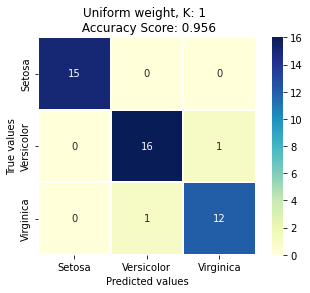

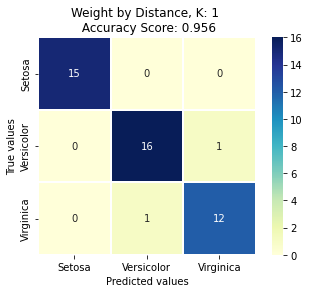

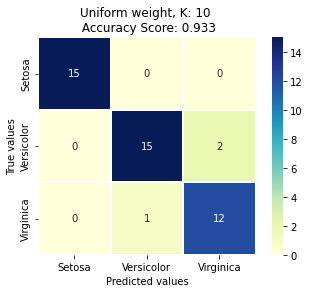

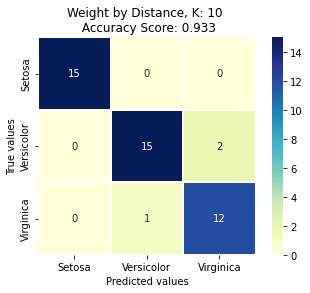

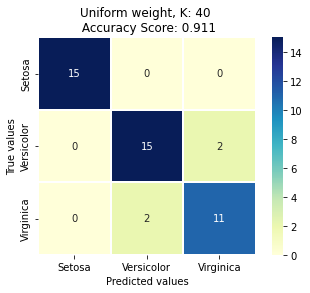

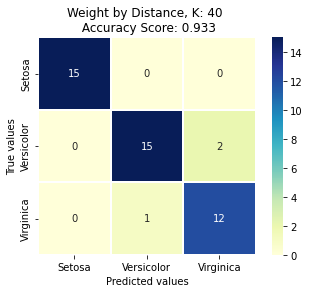

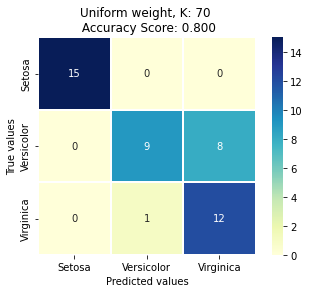

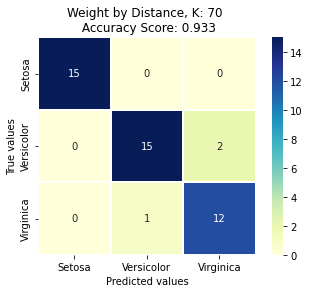

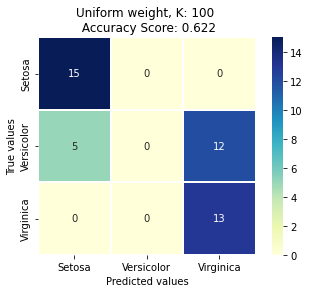

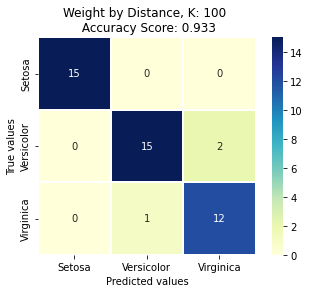

In [ ]:
cmLogReg = metrics.confusion_matrix(yTest, predictionsLogReg)
plt.figure(figsize = (3,3))
sns.heatmap(cmLogReg, annot = True, fmt = "d", linewidths=1.7, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Logistic Regression \n Accuracy Score: %.3f' % score
plt.title(allSampleTitle, size = 12)
plt.show()

for i in range(5):
    sns.heatmap(cmUni[i,0,:,:], annot = True, fmt = "d", linewidths=1.7, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    allSampleTitle = 'Uniform weight, K: {} \n Accuracy Score: %.3f'.format(fiveDifferentK[i]) % scoreUni[i]
    plt.title(allSampleTitle, size = 12)
    plt.show()
    sns.heatmap(cmDist[i,0,:,:], annot = True, fmt = "d", linewidths=1.7, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    allSampleTitle = 'Weight by Distance, K: {} \n Accuracy Score: %.3f'.format(fiveDifferentK[i]) % scoreDist[i]
    plt.title(allSampleTitle, size = 12)
    plt.show()

#### C)
For small k, denoting the number of neighbors, the KNN model produces markedly better results than the logistic regression model. However, after k larger than 40 we see a drop in accuracy for the KNN model when using uniform weights, as seen in the graph in question **b)**. We conclude that the best model for classification of this particular dataset and application area isthe KNN model, using distance weights. Given optimal parameter values for the KNN model, it outperforms the logistic regression model, as seen by the above confusion matrices above for low values of k. The results produced by both models are stochastic, however generally this was the trend.